In [1]:
import numpy as np
import pandas as pd
import scipy.stats

1. Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.

In [3]:
σ = 15

In [9]:
β = 0.95
a = 1 - β
c = 1 - a/2
e = 100*a
c

0.975

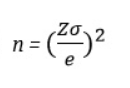

In [2]:
from IPython.display import Image
Image("formuls.png")

In [13]:
Z = 1.96
h = 3
N = ((σ*Z)/e)**2
print(round(N - h), round(N), round(N + h))

32 35 38


2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

In [45]:
import scipy.stats as stats

np.random.seed(12) 
population_men  =stats.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women=stats.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165

In [47]:
t, p = stats.ttest_ind(a=population_women,b=population_men,equal_var=False)
print("t = " + str(round(t, 5)))
print("p = " + str(round(p, 6)))

t = -4.66102
p = 3e-06


In [29]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B0D8A718C8>]],
      dtype=object)

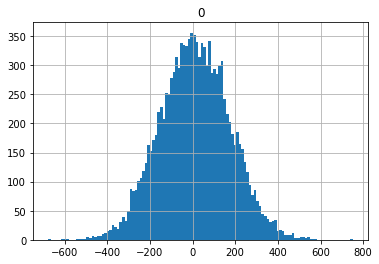

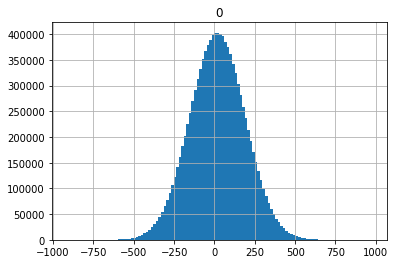

In [30]:
pd.DataFrame(population_women).hist(bins=120)
pd.DataFrame(population_men).hist(bins=120)

По графикам видно, что данные почти не отличаюся, а также P-value = 0.000003 < альфа = 0.001

3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

In [14]:
β = 0.95
a = 1 - β
c = 1 - a/2
e = 100*a

In [16]:
Z = 1.96
σ = 150
h = 50

In [17]:
N = ((σ*Z)/e)**2
print(round(N - h), round(N), round(N + h))

3407 3457 3507


4.  Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, если уровнь значимости принять за 0.05 ?

In [18]:
observations = pd.DataFrame([[25,36],[15,44]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,25,36
Солнце,15,44


In [21]:
import scipy as sp
oddsratio, pvalue = sp.stats.fisher_exact(observations)
pvalue

0.08323639416753109

Поскольку P-value = 0.08 > альфа = 0.05, то мы можим говорить, что маг действительно не умеет предсказывать погоду, так как P-value > альфа, т.е. ответы волшебника сильно различаются с реальностью

5. Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки

In [31]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [32]:
β = 0.9

In [34]:
def mean_confidence_interval(data, confidence):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)
    return m-h,m, m+h#,h

In [36]:
l,s,r=mean_confidence_interval(data, β)
l,s,r

(6.074074746111319, 6.628571428571429, 7.183068111031539)

6. Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

In [38]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

In [49]:
t , p  = stats.ttest_ind(data_1,data_2)
print("t = " + str(round(t, 5)))
print("p = " + str(round(p, 7)))

t = 7.35745
p = 0.0


Поскольку p-value почти равен 0, то это означает, что он меньше уровня значимости, следовательно, мы должен отвергнуть нулевую гипотезу, что выборки принадлежат одному множеству

7. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.
Предположим, Вы сформировали две гипотезы: Нулевая гипотеза - распределение нормальное, Альтернативная гипотеза - распределение не нормальное.

Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

А какой изначально был уровень значимости a?
Но вообще p-value показывает, что есть 3%, что результат обусловлен случайностью. Если принимаем изначальный уровень значности = 5%, то тогда отвергаем нулевую гипотезу. 
Но сама задача очень странная, так как Закон больших чисел никто не отменял.

8. Первая выборка — это пациенты, которых лечили препаратом А. 
Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)

b) При каком минимальном P-values различия были бы уже значимы? 

In [50]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B0DA6853C8>]],
      dtype=object)

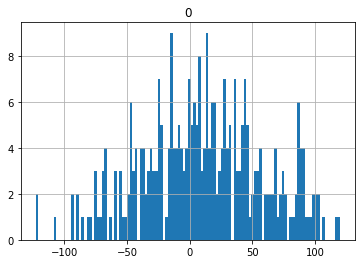

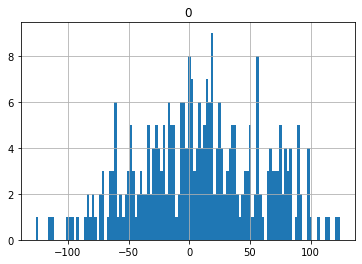

In [51]:
pd.DataFrame(A).hist(bins=120)
pd.DataFrame(B).hist(bins=120)

In [53]:
t , p  = stats.ttest_ind(a=A,b=B,equal_var=False)
print("t = " + str(round(t, 3)))
print("p = " + str(round(p, 3)))

t = 0.332
p = 0.74


Т.е. мы получаем, что P-value = 0.74 > альфа = 0.05, то выходит, что гипотеза о равности выборок все-таки не может отвергаться, т.е. различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики препаратов А и Б.
Я бы сказала, что минимальное P-value должно быть где-то на границе с альфой, т.е. примерно 0.05